# Info

Long, C. N., & Ackerman, T. P. (2000). Identification of clear skies from broadband pyranometer measurements and calculation of downwelling shortwave cloud effects. Journal of Geophysical Research, D: Atmospheres, 105(D12), 15609–15626. https://doi.org/10.1029/2000JD900077

In [1]:
p2fld = pl.Path('/home/hagen/data/grad/surfrad/radflux_nc/v1.0/tbl/2019/')
p2f_l = list(p2fld.glob('*'))

In [2]:
13, 18

(13, 18)

/home/hagen/data/grad/surfrad/radflux_nc/v1.0/tbl/2019/tbl.radflux.v1.0.20191230.nc
18


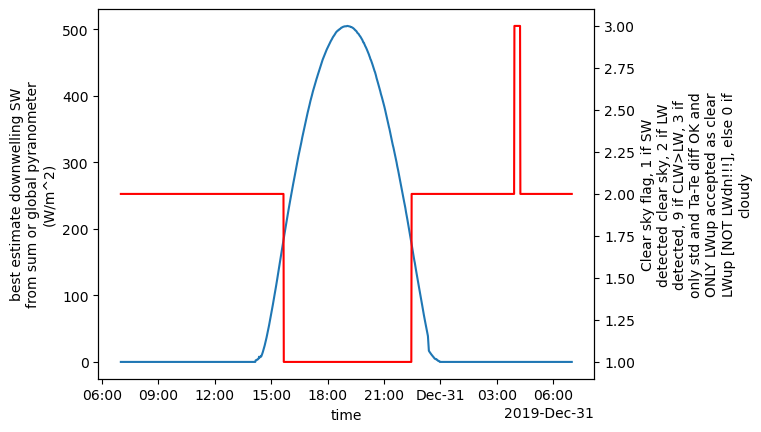

In [3]:
i = 18
# i += 1
print(p2f_l[i])
print(i)
ds = xr.open_dataset(p2f_l[i])

f, a = plt.subplots()
ds.shortwave_down_best_estimate.plot(ax = a)

at = a.twinx()
ds.flag_clear_sky.plot(ax = at, color = 'red')

In [4]:
ds.flag_clear_sky

<xarray.DataArray 'flag_clear_sky' (time: 1440)> Size: 12kB
[1440 values with dtype=int64]
Coordinates:
  * time     (time) datetime64[ns] 12kB 2019-12-30T07:00:00 ... 2019-12-31T06...
Attributes:
    long_name:  Clear sky flag, 1 if SW detected clear sky, 2 if LW detected,...

In [5]:
ds

<xarray.Dataset> Size: 484kB
Dimensions:                                    (time: 1440)
Coordinates:
  * time                                       (time) datetime64[ns] 12kB 201...
Data variables: (12/41)
    distance_from_sun                          (time) float64 12kB ...
    shortwave_down_best_estimate               (time) float64 12kB ...
    shortwave_down_clear_sky_estimate          (time) float64 12kB ...
    longwave_down                              (time) float64 12kB ...
    longwave_down_clear_sky_estimate           (time) float64 12kB ...
    shortwave_up                               (time) float64 12kB ...
    ...                                         ...
    lwdtc                                      (time) float64 12kB ...
    lwdtd                                      (time) float64 12kB ...
    lwutc                                      (time) float64 12kB ...
    lwutd                                      (time) float64 12kB ...
    solar_zenith_angle                         (time) float64 12kB ...
    time_local                                 (time) datetime64[ns] 12kB ...

# Normalized Total  Shortwave Magnitude Test

$F_N = F_{\downarrow}/\mu^b_0$

- $F_N$: normalized total shortwave
- $F_{\downarrow}$ : downwelling total shortwave
- $\mu_0$: cosine of the solar senith angle
- $b$: a constant

In [19]:
# import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as atmsrf
# sp = atmsrf.network.stations.Table_Mountain.get_sun_position(ds.time)

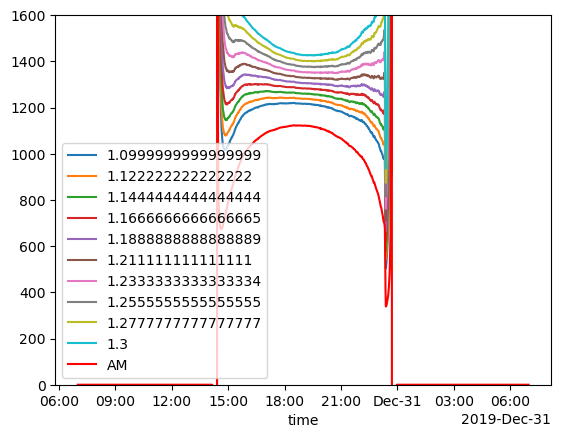

In [18]:
bs = np.logspace(np.log10(1), np.log10(2), 5)
bc = 1.2
bd = 0.1
bs = np.linspace(bc-bd, bc + bd, 10)
f, a = plt.subplots()

for b in bs:
    fn = ds.shortwave_down_best_estimate / (np.cos(np.deg2rad(ds.solar_zenith_angle))**b)
    fn.plot(ax = a, label = f'{b}')

# (ds.shortwave_down_best_estimate * sp.airmass).plot(ax = a, label = 'AM', color = 'red')

a.set_ylim(0,1600)
a.legend()

In [24]:
ds['cs_th_h'] = 1500
ds['cs_th_l'] = 1200

In [27]:
ds.cs_th_l.where(np.cos(np.deg2rad(ds.solar_zenith_angle)) < 0.2) = 1000

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (141106864.py, line 1)

# Maximum  Diffuse  Shortwave  Test

# Change in Magnitude With  Time Test

# Normalized  Diffuse Ratio  Variability  Test